In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

# Visualising surfaces

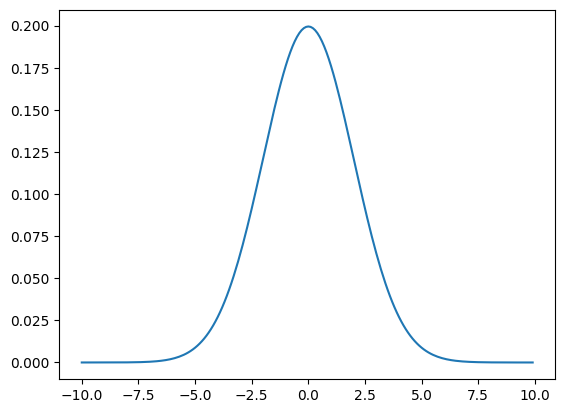

In [ ]:
x=np.arange(-10,10,0.1)
fx=norm.pdf(x,0,2) #Normal pdf buildin in scipy
plt.plot(x,fx)

# Creating meshgrid and plotting surface

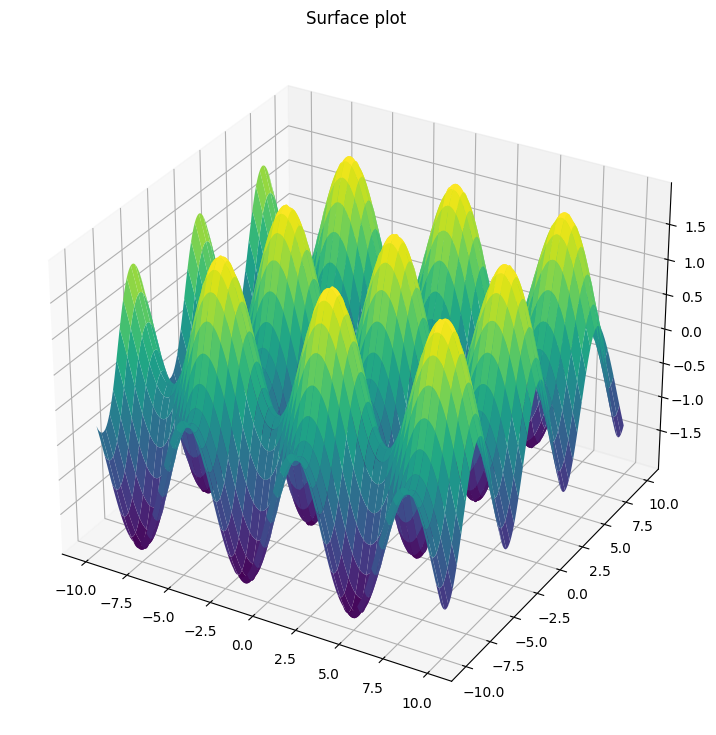

In [ ]:
fig = plt.figure(figsize =(16, 9))
ax = fig.add_subplot(111, projection='3d')
x=np.arange(-10,10,0.1)
y=np.arange(-10,10,0.1)
x,y=np.meshgrid(x,y)
z=np.sin(x)+np.cos(y)
#z=np.exp(-(x**2+y**2)) # Try it.

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()




#Task 1: Run and follow through the code above.
1. Create a meshgrid of $x$ and $y$ ranging from -10 to 10 in stepssize of 0.15
2. Given that the CRV's $x$ and $y$ are both described by normal pdf. Mean of $x$ is 2.5 and variance of $x$ is 1.2. Mean of $y$ is 0 and variance is 6.
3. Construct the surface plot of the bivariate normal pdf.

#Task 2: Distribution of means (Central Limit Theorem)
Step 1: The dataset  "`Height_dummy_A3.xlsx`" given contains the data on height of 6500 individuals from a population. Load the data and generate the histrogram to have an idea of the distribution of the height in the population.

Step 2: Determine the mean and variance of the distribution.

Step 3: Collect a sample of 100 heights  randomly selected from the data set and calculate its mean.

Step 4: Repeat this Step 3 for multiple times (n) and in each case, determine the mean of that 100 set.

Step 5: Look at the distribution of the means by plotting the histogram.

#The distribution of the means approaches normal as the number of sample means (n) approaces infinity. This is the Central Limit Theorem.